### **Importar las librerías a utilizar**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
import pickle
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


### **Importar los datos de la parte anterior**

In [7]:
with open("data.pkl", "rb") as f:
    X_train, X_test, y_train, y_test = pickle.load(f)

print(X_train.head(), X_test.head(), y_train.head(), y_test.head())

        Id  MSSubClass  LotFrontage  LotArea  Neighborhood  Condition1  \
87      88         160         40.0     3951      0.058904    0.863014   
1457  1458          70         66.0     9042      0.034932    0.863014   
1000  1001          20         74.0    10206      0.068493    0.863014   
1441  1442         120         69.0     4426      0.102740    0.863014   
927    928          60         69.0     9900      0.050000    0.055479   

      Condition2  OverallQual  OverallCond  YearBuilt  ...  BsmtFinType2_None  \
87      0.989726            6            5       2009  ...              False   
1457    0.989726            7            9       1941  ...              False   
1000    0.989726            3            3       1952  ...               True   
1441    0.989726            6            5       2004  ...              False   
927     0.989726            7            5       1968  ...              False   

      BsmtFinType2_Rec  BsmtFinType2_Unf  GarageType_Attchd  \
87   

### **Árbol de regresión**


===== Resultados del árbol de regresión inicial =====
R² Score: 0.8917
MAE: $19369.47
MSE: $771748437.57
RMSE: $27780.36


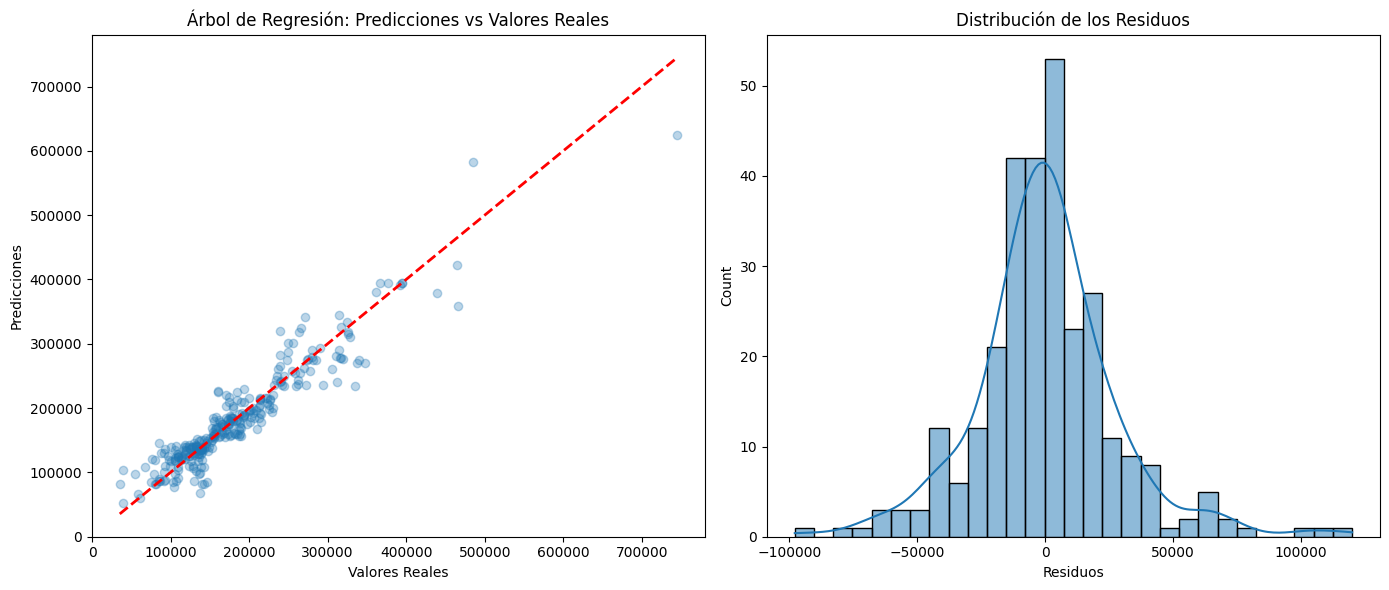

In [10]:

# Elabora un árbol de regresión para predecir el precio de las casas
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Usa el árbol para predecir y analizar resultados
y_pred_tree = tree_reg.predict(X_test)

# Calcular métricas de evaluación
r2_tree = r2_score(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)

print("\n===== Resultados del árbol de regresión inicial =====")
print(f"R² Score: {r2_tree:.4f}")
print(f"MAE: ${mae_tree:.2f}")
print(f"MSE: ${mse_tree:.2f}")
print(f"RMSE: ${rmse_tree:.2f}")

# Graficar los resultados
plt.figure(figsize=(14, 6))

# Gráfico de dispersión de las predicciones vs los valores reales
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_tree, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Árbol de Regresión: Predicciones vs Valores Reales')

# Histograma de los residuos
plt.subplot(1, 2, 2)
residuos = y_test - y_pred_tree
sns.histplot(residuos, kde=True)
plt.xlabel('Residuos')
plt.title('Distribución de los Residuos')

plt.tight_layout()
plt.show()